# Analyzing Traffic Accidents in Bogotá from 2015 to 2021 - Team 82
*José Armando Delgado Álvarez, Andrés Felipe Guzmán Romero, Luis Camilo Jiménez Álvarez, Juan Pablo Lancheros Rodríguez, Paola Andrea Matheus Arbeláez, Alejandro Moreno Fresneda, Leidy Milena Nieves Mendoza, Andrés Felipe Pérez Osorio*

# Data Analysis and Computation

In [ ]:
import rpy2                  as rpy2
import rpy2.robjects         as robjects
from rpy2.robjects           import r, pandas2ri
import numpy                 as np
import pandas                as pd
from pandas.api.types        import CategoricalDtype
import geopandas             as gpd

Unable to determine R home: [WinError 2] El sistema no puede encontrar el archivo especificado


In [ ]:
df = pd.re
ad_csv ('data/df_clean.csv', delimiter=',')
df

,id,form_id,accident_code,address,severity,accident_type,borough,full_date,latitude,longitude,civ,road_id,year,month,day_of_week,hour,month_year
0,1,A000640275,4484660,AV AVENIDA BOYACA-CL 79 02,Only damages,Crash,ENGATIVA,2017-06-12 05:30:00+00:00,4.693807,-74.090924,10006772.0,221236.0,2017,June,Monday,5,"Jun, 2017"
1,2,A001233353,10533499,CL 26 S- KR 50 02,With Injured,Other,PUENTE ARANDA,2020-11-19 02:05:00+00:00,4.603000,-74.121000,16004560.0,NaN,2020,November,Thursday,2,"Nov, 2020"
2,4,A001232786,10533629,KR 9 - CL 100 02,Only damages,Crash,USAQUEN,2020-11-10 13:30:00+00:00,4.682000,-74.042000,30001107.0,NaN,2020,November,Tuesday,13,"Nov, 2020"
3,7,A000200705,4412699,CL 63A-KR 72 S 02,Only damages,Crash,CIUDAD BOLIVAR,2015-05-11 10:50:00+00:00,4.587187,-74.166937,19001483.0,136166.0,2015,May,Monday,10,"May, 2015"
4,8,A000402862,4447845,KR 27-CL 9 14,Only damages,Crash,LOS MARTIRES,2016-06-08 21:30:00+00:00,4.607648,-74.092901,14000548.0,239719.0,2016,June,Wednesday,21,"Jun, 2016"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199095,421907,A001341297,10548522,KR 86 F - CL 33 S 02,Only damages,Crash,KENNEDY,2021-08-30 16:31:00+00:00,4.637000,-74.160000,8003090.0,NaN,2021,August,Monday,16,"Aug, 2021"
199096,421908,A001305748,10546116,CL 42 B S- KR 81 L 02,With Injured,Run-over,KENNEDY,2021-08-03 14:00:00+00:00,4.628000,-74.167000,8005066.0,NaN,2021,August,Tuesday,14,"Aug, 2021"
199097,421909,A001238302,10536074,DG 2 S- KR 79 12,With Injured,Crash,KENNEDY,2021-03-19 12:50:00+00:00,4.624830,-74.158247,8005839.0,NaN,2021,March,Friday,12,"Mar, 2021"
199098,421910,A001297106,10538181,CL 43 S- KR 80 02,With Injured,Crash,KENNEDY,2021-04-18 21:21:00+00:00,4.622000,-74.167000,8011660.0,NaN,2021,April,Sunday,21,"Apr, 2021"


In [ ]:
#Extension that allows the use of R code inside a Python Notebook
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
df <- read.csv("C:/Users/mathe/OneDrive/Desktop/Data Science/DataCamp/DSA4_project/data/df_clean.csv", stringsAsFactors=TRUE)
glimpse(df)

Rows: 199,100
Columns: 17
$ id            <int> 1, 2, 4, 7, 8, 9, 10, 12, 13, 15, 17, 18, 20, 23, 25, 28~
$ form_id       <fct> A000640275, A001233353, A001232786, A000200705, A0004028~
$ accident_code <int> 4484660, 10533499, 10533629, 4412699, 4447845, 10533587,~
$ address       <fct> AV AVENIDA BOYACA-CL 79 02, CL 26 S- KR 50 02, KR 9 - CL~
$ severity      <fct> Only damages, With Injured, Only damages, Only damages, ~
$ accident_type <fct> Crash, Other, Crash, Crash, Crash, Run-over, Crash, Othe~
$ borough       <fct> ENGATIVA, PUENTE ARANDA, USAQUEN, CIUDAD BOLIVAR, LOS MA~
$ full_date     <fct> 2017-06-12 05:30:00+00:00, 2020-11-19 02:05:00+00:00, 20~
$ latitude      <dbl> 4.693807, 4.603000, 4.682000, 4.587187, 4.607648, 4.7780~
$ longitude     <dbl> -74.09092, -74.12100, -74.04200, -74.16694, -74.09290, -~
$ civ           <dbl> 10006772, 16004560, 30001107, 19001483, 14000548, 100645~
$ road_id       <dbl> 221236, NaN, NaN, 136166, 239719, NaN, 31431, NaN, 21962~
$ year        

In [ ]:
%%R
#Re-arrange levels in month, day_of_week and borough
df$month = factor(df$month, levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
df$day_of_week = factor(df$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
df$borough = factor(df$borough, levels=c("SUMAPAZ", "CANDELARIA", "ANTONIO NARIÑO", "USME","RAFAEL URIBE URIBE", "SAN CRISTOBAL", "TUNJUELITO", "SANTA FE", "LOS MARTIRES", "CIUDAD BOLIVAR",
                                         "BOSA", "BARRIOS UNIDOS", "TEUSAQUILLO", "CHAPINERO", "PUENTE ARANDA", "FONTIBON", "SUBA", "USAQUEN", "ENGATIVA", "KENNEDY"))

## Negative Binomial Regression Analysis

In [ ]:
%%R
library(MASS) #for Negative Binomial Regression Analysis
library(rcompanion) # For Nagelkerke pseudo-R-squared
library(car) # For ANOVA Chi-squared
# For Tukey comparison and Visualization
library(multcomp)
library(emmeans)
library(multcompView)

df_year = df %>% 
  group_by(borough, month, day_of_week) %>%
  summarise(n = n())
df_year = as.data.frame(df_year)

`summarise()` has grouped output by 'borough', 'month'. You can override using
the `.groups` argument.


### Day of Week vs. Number of Accidents

In [ ]:
%%R
NB21 <- glm.nb(n~day_of_week, data=df_year)
summary(NB21)


Call:
glm.nb(formula = n ~ day_of_week, data = df_year, init.theta = 2.092651951, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7137  -0.9121  -0.2916   0.6117   1.9112  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           4.78530    0.04618 103.624  < 2e-16 ***
day_of_weekTuesday    0.12043    0.06528   1.845   0.0650 .  
day_of_weekWednesday  0.08150    0.06521   1.250   0.2114    
day_of_weekThursday   0.07830    0.06521   1.201   0.2299    
day_of_weekFriday     0.15656    0.06520   2.401   0.0163 *  
day_of_weekSaturday   0.08614    0.06514   1.322   0.1860    
day_of_weekSunday    -0.34413    0.06528  -5.272 1.35e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2.0927) family taken to be 1)

    Null deviance: 1811.1  on 1602  degrees of freedom
Residual deviance: 1736.5  on 1596  degrees of freedom
AIC: 18261

Number of 

In [ ]:
%%R
nagelkerke(NB21)

$Models
                                                           
Model: "glm.nb, n ~ day_of_week, df_year, 2.092651951, log"
Null:  "glm.nb, n ~ 1, df_year, 2.0078193, log"            

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                           0.00398951
Cox and Snell (ML)                 0.04456610
Nagelkerke (Cragg and Uhler)       0.04456660

$Likelihood.ratio.test
 Df.diff LogLik.diff Chisq    p.value
      -6      -36.54 73.08 9.5299e-14

$Number.of.observations
           
Model: 1603
Null:  1603

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"



In [ ]:
%%R
Anova(NB21, type="II", test="LR")

Analysis of Deviance Table (Type II tests)

Response: n
            LR Chisq Df Pr(>Chisq)    
day_of_week   74.587  6  4.667e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


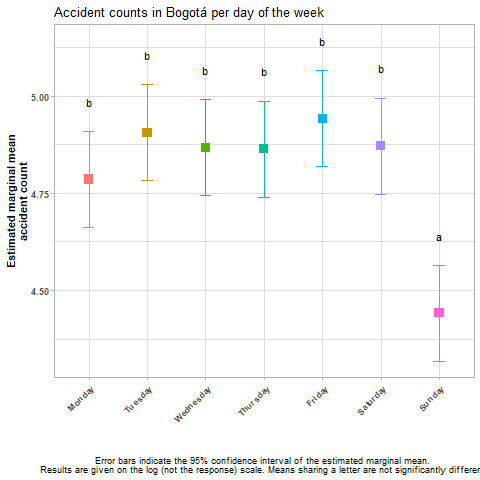

In [ ]:
%%R
marginal = emmeans(NB21, ~ day_of_week)
pairs(marginal, adjust="tukey")
cld = cld(marginal, alpha   = 0.05, Letters = letters, adjust =  "sidak")

cld$.group=gsub(" ", "", cld$.group)

ggplot(cld, aes(x = day_of_week, y = emmean, label = .group, color=day_of_week)) +
  geom_point(shape  = 15, size   = 4) +
  geom_errorbar(aes(ymin  =  asymp.LCL, ymax  =  asymp.UCL), width =  0.2, size  =  0.7) +
  theme_light() +
  theme(axis.title   = element_text(face = "bold"),
        axis.text    = element_text(face = "bold"),
        plot.caption = element_text(hjust = 0.5),
        legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ylab("Estimated marginal mean\naccident count") +
  xlab(" ") +
  ggtitle("Accident counts in Bogotá per day of the week") +
  labs(caption  = paste0("\nError bars indicate the 95% confidence ",
                         "interval of the estimated marginal mean. \n",
                         "Results are given on the log (not the response) scale. ",
                         "Means sharing a letter are ",
                         "not significantly different."), hjust=0.5)+
  geom_text(nudge_x = c(0,0,0,0,0,0,0), nudge_y = c(0.2,0.2,0.2,0.2,0.2,0.2,0.2),  color   = "black")+
  scale_fill_discrete(breaks = cld$day_of_week)

### Month vs. Number of Accidents

In [ ]:
%%R
NB22 <- glm.nb(n ~ month, data=df_year)
summary(NB22)


Call:
glm.nb(formula = n ~ month, data = df_year, init.theta = 2.023506758, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6173  -0.9168  -0.2969   0.5913   1.7786  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     4.66779    0.06130  76.143  < 2e-16 ***
monthFebruary   0.19537    0.08662   2.255  0.02411 *  
monthMarch      0.24641    0.08677   2.840  0.00451 ** 
monthApril      0.08373    0.08666   0.966  0.33394    
monthMay        0.20424    0.08678   2.353  0.01860 *  
monthJune       0.16436    0.08680   1.894  0.05827 .  
monthJuly       0.19121    0.08663   2.207  0.02729 *  
monthAugust     0.23055    0.08678   2.657  0.00789 ** 
monthSeptember  0.14257    0.08664   1.645  0.09987 .  
monthOctober    0.14029    0.08681   1.616  0.10607    
monthNovember   0.12719    0.08681   1.465  0.14289    
monthDecember   0.09962    0.08650   1.152  0.24944    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0

In [ ]:
%%R
nagelkerke(NB22)

$Models
                                                     
Model: "glm.nb, n ~ month, df_year, 2.023506758, log"
Null:  "glm.nb, n ~ 1, df_year, 2.0078193, log"      

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                          0.000751634
Cox and Snell (ML)                0.008552430
Nagelkerke (Cragg and Uhler)      0.008552520

$Likelihood.ratio.test
 Df.diff LogLik.diff  Chisq p.value
     -11     -6.8843 13.769 0.24607

$Number.of.observations
           
Model: 1603
Null:  1603

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"



In [ ]:
%%R
Anova(NB22, type="II", test="LR")

Analysis of Deviance Table (Type II tests)

Response: n
      LR Chisq Df Pr(>Chisq)
month   13.821 11      0.243


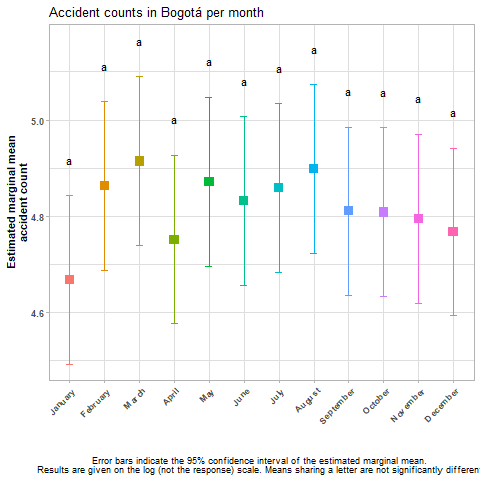

In [ ]:
%%R
marginal2 = emmeans(NB22, ~month)
pairs(marginal2, adjust="tukey")
cld2 = cld(marginal2, alpha   = 0.05, Letters = letters, adjust =  "sidak")

cld2$.group=gsub(" ", "", cld2$.group)

ggplot(cld2, aes(x = month, y = emmean, label = .group, color=month)) +
  geom_point(shape  = 15, size   = 4) +
  geom_errorbar(aes(ymin  =  asymp.LCL, ymax  =  asymp.UCL), width =  0.2, size  =  0.7) +
  theme_light() +
  theme(axis.title   = element_text(face = "bold"),
        axis.text    = element_text(face = "bold"),
        plot.caption = element_text(hjust = 0.5),
        legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ylab("Estimated marginal mean\naccident count") +
  xlab(" ") +
  ggtitle("Accident counts in Bogotá per month") +
  labs(caption  = paste0("\nError bars indicate the 95% confidence ",
                         "interval of the estimated marginal mean. \n",
                         "Results are given on the log (not the response) scale. ",
                         "Means sharing a letter are ",
                         "not significantly different."), hjust=0.5)+
 geom_text(nudge_x = c(0,0,0,0,0,0,0,0,0,0,0,0),
            nudge_y = c(0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25),  color   = "black") +
  scale_fill_discrete(breaks = cld$month)

## Analysis of variance per boroughs

In [ ]:
%%R
df_year_bor = df %>% 
  group_by(borough,year) %>%
  summarise(n = n())
df_year_bor = as.data.frame(df_year_bor)
NB24 <- lm(n ~ borough, data=df_year_bor)
summary.aov(NB24)
summary(NB24)

`summarise()` has grouped output by 'borough'. You can override using the
`.groups` argument.

Call:
lm(formula = n ~ borough, data = df_year_bor)

Residuals:
     Min       1Q   Median       3Q      Max 
-1344.00  -117.25    43.57   226.93   774.29 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.75     209.94   0.008 0.993364    
boroughCANDELARIA           124.25     263.18   0.472 0.637775    
boroughUSME                 572.11     263.18   2.174 0.031842 *  
boroughRAFAEL URIBE URIBE   760.11     263.18   2.888 0.004660 ** 
boroughSAN CRISTOBAL        760.39     263.18   2.889 0.004645 ** 
boroughTUNJUELITO           762.68     263.18   2.898 0.004527 ** 
boroughSANTA FE             776.96     263.18   2.952 0.003851 ** 
boroughLOS MARTIRES         891.11     263.18   3.386 0.000982 ***
boroughCIUDAD BOLIVAR      1141.82     263.18   4.339 3.17e-05 ***
boroughBOSA                1343.54     263.18   5.105 1.38e-06 *

R[write to console]: Note: adjust = "tukey" was changed to "sidak"
because "tukey" is only appropriate for one set of pairwise comparisons



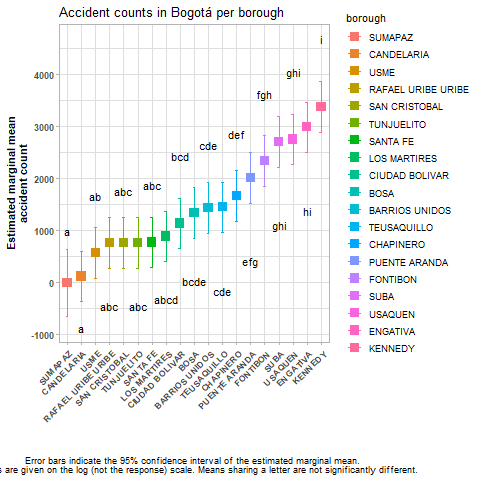

In [ ]:
%%R
marginal3 = emmeans(NB24, ~ borough)
cld3 = cld(marginal3, alpha=0.05, Letters=letters, adjust="tukey")
cld3$.group=gsub(" ", "", cld3$.group)
ggplot(cld3, aes(x = borough, y = emmean, color = borough, label = .group)) +
geom_point(shape  = 15, size   = 4) +
geom_errorbar(aes(ymin  =  lower.CL, ymax  =  upper.CL), width =  0.2, size  =  0.7) +
theme_light()+
theme(axis.title   = element_text(face = "bold"),
        axis.text    = element_text(face = "bold"),
        plot.caption = element_text(hjust = 0.5),
        axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
ylab("Estimated marginal mean\naccident count") +
xlab(" ") +
ggtitle("Accident counts in Bogotá per borough") +
labs(caption  = paste0("\nError bars indicate the 95% confidence ",
                         "interval of the estimated marginal mean. \n",
                         "Results are given on the log (not the response) scale. ",
                         "Means sharing a letter are ",
                         "not significantly different."), hjust=0.5)+  
geom_text(nudge_x = c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0), 
            nudge_y = c(1000,-1000,1100,-1200,1000,-1200,1100,-1200,1300,-1300,1200,-1600,1200,-1600,1300,-1600,1300,-1600,1300,-1600),
            color   = "black")

## Cluster Analysis

In [ ]:
%%R
df_density <- read.csv("C:/Users/mathe/OneDrive/Desktop/Data Science/DataCamp/DSA4_project/data/df_density.csv", stringsAsFactors=TRUE)
df_density_wide <- df_density %>% 
  dplyr::select(borough, year, accident_count)%>%
  pivot_wider(names_from = year, values_from = accident_count)
df_density_wide = as.data.frame(df_density_wide)
rownames(df_density_wide) <- as.character(df_density_wide$borough)
df_density_wide$borough <- NULL

R[write to console]: Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



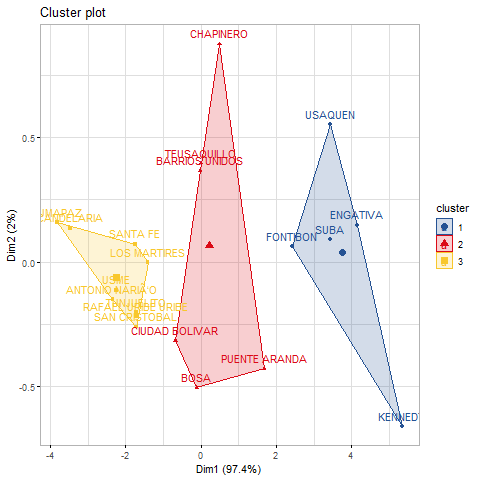

In [ ]:
%%R
library(cluster)
km.res <- kmeans(df_density_wide, 3, nstart = 25)
palette <- c("#255293", "#db0a16", "#f8c72d")
# Visualize
library(factoextra)
fviz_cluster(km.res, data = df_density_wide,
             ellipse.type = "convex",
             palette = palette,
             ggtheme = theme_light())

## Linear Regression Density vs. Accidents

R[write to console]: `geom_smooth()` using formula 'y ~ x'



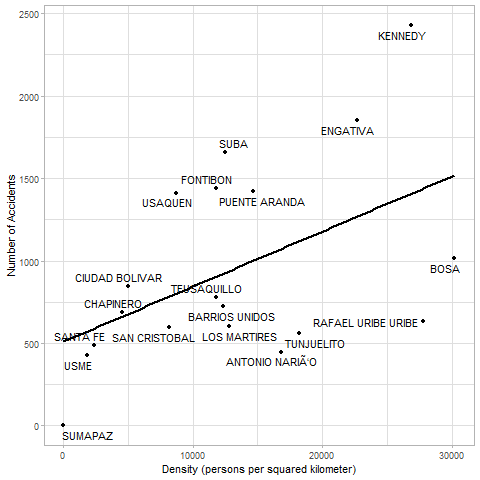

In [ ]:
%%R
library(ggrepel)
df_density2021 <-df_density %>% filter(year== 2021)
rownames(df_density2021) <- as.character(df_density2021$borough)
ggplot(df_density2021, aes(x=density, y=accident_count))+
  geom_point()+
  stat_smooth(method="lm",se=FALSE, color="black")+
  geom_text_repel(label=rownames(df_density2021))+
  ylab("Number of Accidents") +
  xlab("Density (persons per squared kilometer)")+
  theme_light()

In [ ]:
%%R
mod_dens <- lm(accident_count ~ density, data=df_density)
summary.aov(mod_dens)
summary(mod_dens)


Call:
lm(formula = accident_count ~ density, data = df_density)

Residuals:
    Min      1Q  Median      3Q     Max 
-1451.0  -764.8  -275.3   640.8  2132.2 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.997e+02  1.490e+02   6.710 5.31e-10 ***
density     3.903e-02  9.829e-03   3.971 0.000117 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 959.8 on 131 degrees of freedom
  (7 observations deleted due to missingness)
Multiple R-squared:  0.1074,	Adjusted R-squared:  0.1006 
F-statistic: 15.77 on 1 and 131 DF,  p-value: 0.0001175

